In [1]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import resample
import soundfile as sf
from tqdm import tqdm
from pydub import AudioSegment
import librosa.display as lplt
from IPython.display import Audio
import os
import scipy

c:\Users\hsohr\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:

Ravdess = 'Data/Raw/'
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                        Path
0  neutral  Data/Raw/Actor_01/03-01-01-01-01-01-01.wav
1  neutral  Data/Raw/Actor_01/03-01-01-01-01-02-01.wav
2  neutral  Data/Raw/Actor_01/03-01-01-01-02-01-01.wav
3  neutral  Data/Raw/Actor_01/03-01-01-01-02-02-01.wav
4     calm  Data/Raw/Actor_01/03-01-02-01-01-01-01.wav

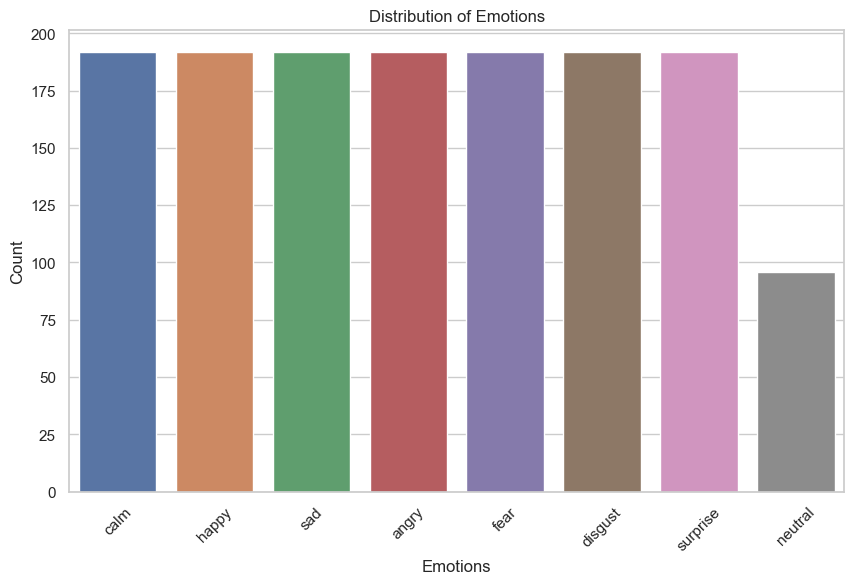

In [4]:
# Count the occurrences of each emotion
emotion_counts = Ravdess_df['Emotions'].value_counts()

# Plotting using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotions', data=Ravdess_df, order=emotion_counts.index)
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [5]:

def plot_waveform(signal, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    librosa.display.waveshow(signal, sr=sr)
    plt.show()
    
def plot_spectrogram(signal, sr, emotion):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(signal)
    Xdb = librosa.amplitude_to_db(abs(X))
    
    # Set the frequency range to 5000 Hz
    freq_range = librosa.fft_frequencies(sr=sr)
    freq_limit = 10000
    freq_index_limit = np.argmax(freq_range >= freq_limit)
    
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    plt.ylim(0, freq_limit)
    
    # Display only up to 5000 Hz
    librosa.display.specshow(Xdb[:freq_index_limit, :], sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    
    plt.colorbar()
    
def plot_f0(signal, sr, emotion):
    # F0 (fundamental frequency)
    hop_length = 256  # Adjust this value based on your preference
    f0, voiced_flag, voiced_probs = librosa.pyin(signal, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'), hop_length=hop_length, sr=sr)


    time_f0 = librosa.times_like(f0, hop_length=hop_length, sr=sr)

    # Plot the F0 on a secondary y-axis
    plt.figure(figsize=(12, 4))
    plt.plot(time_f0, f0, label='F0', color='red', linestyle='dashed')
    plt.title('F0 for audio with {} emotion'.format(emotion), size=15)
    plt.xlabel('Time (s)')
    plt.ylabel('F0 (Hz)')
    plt.legend()

    plt.show()

Sample rate is 48000


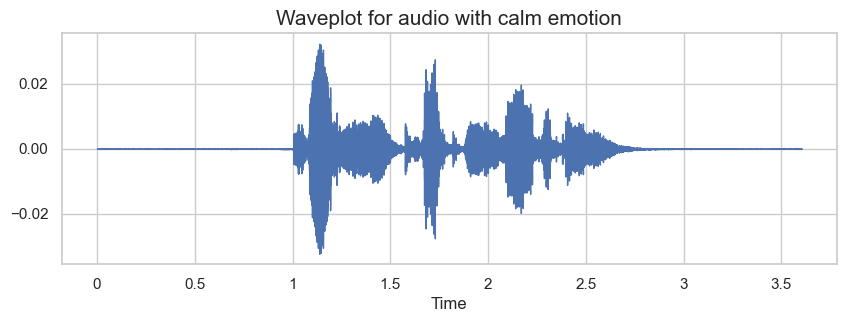

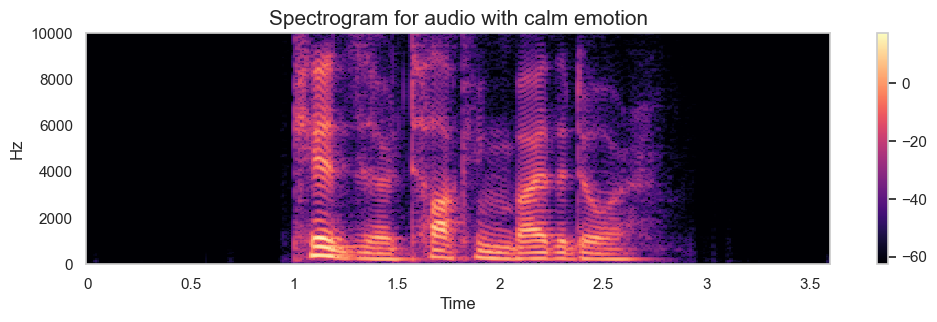

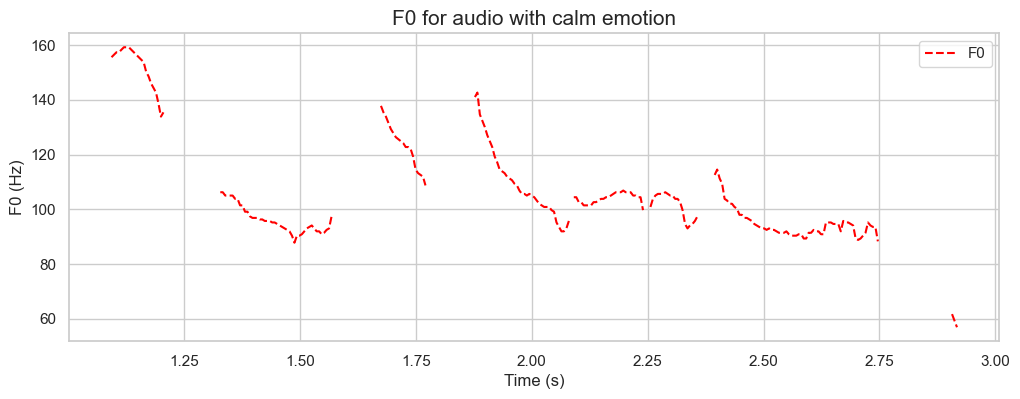

In [6]:
emotion='calm'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
# Create time values for the x-axis
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr, emotion)
Audio(path)

Sample rate is 48000


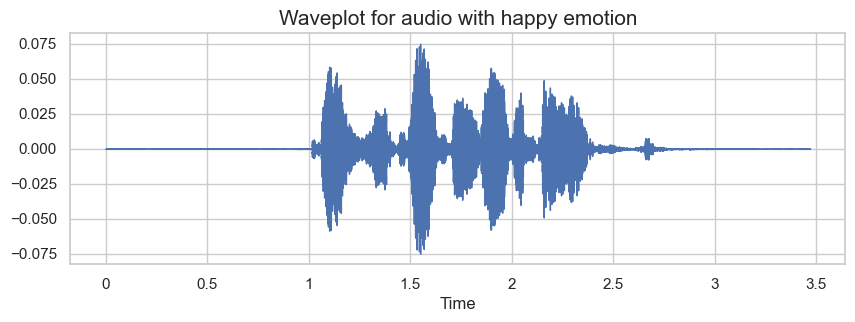

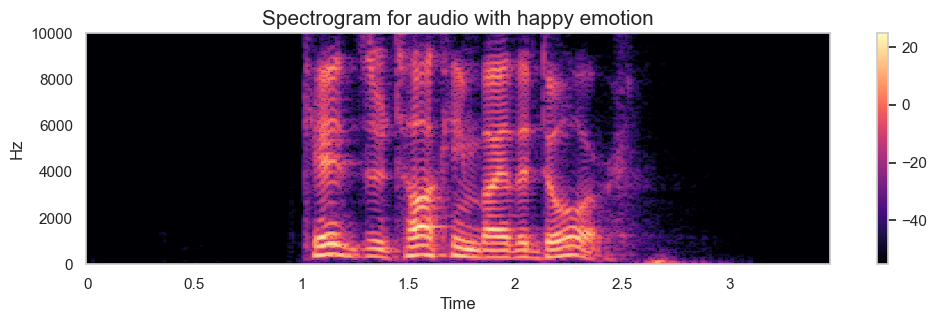

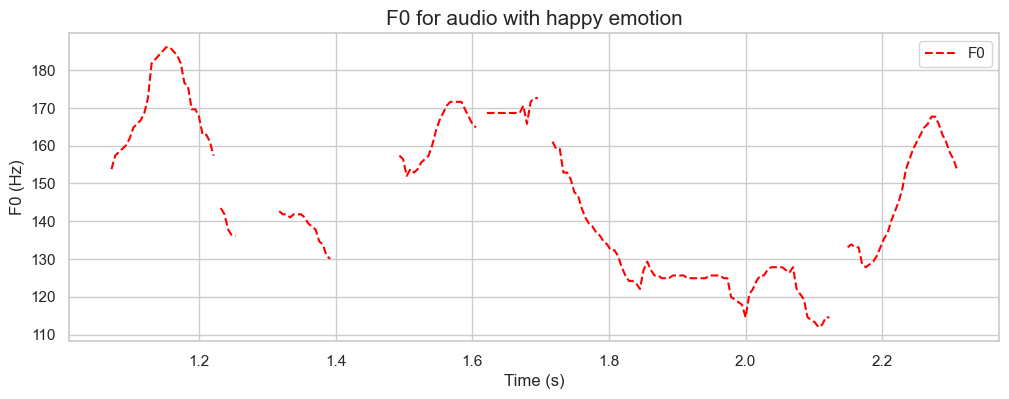

In [7]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
# Create time values for the x-axis
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


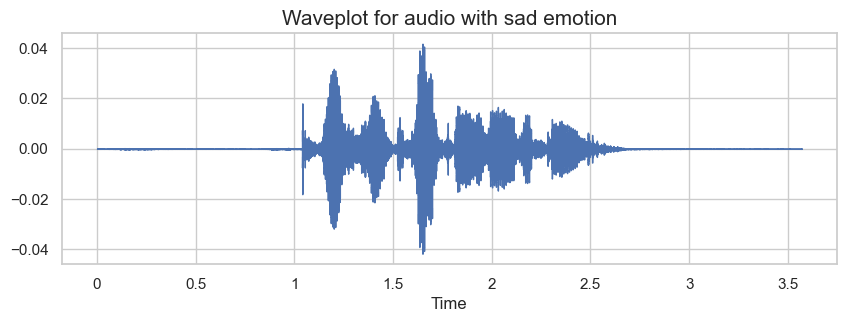

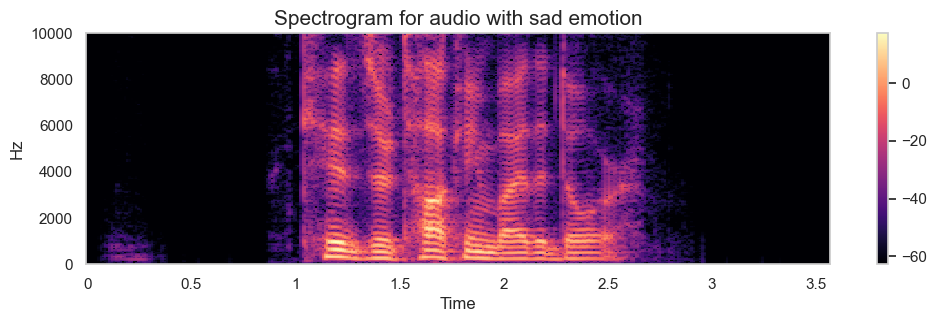

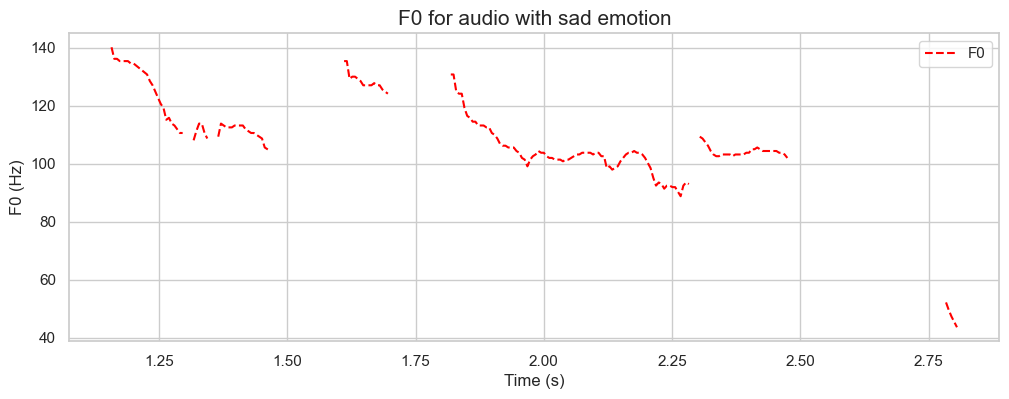

In [8]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
# Create time values for the x-axis
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


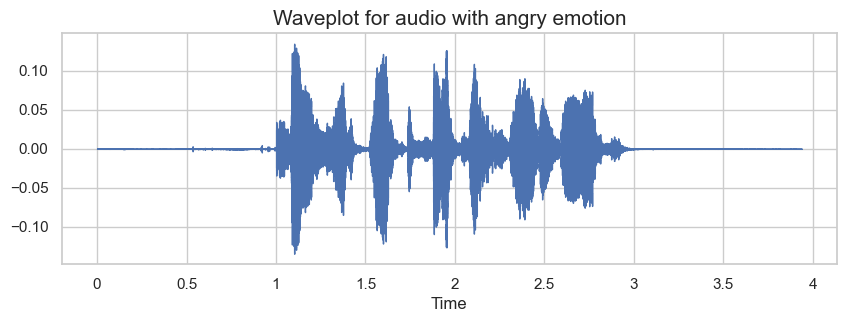

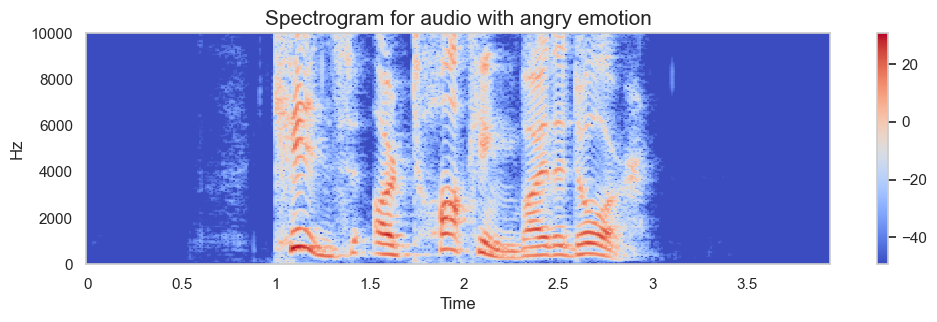

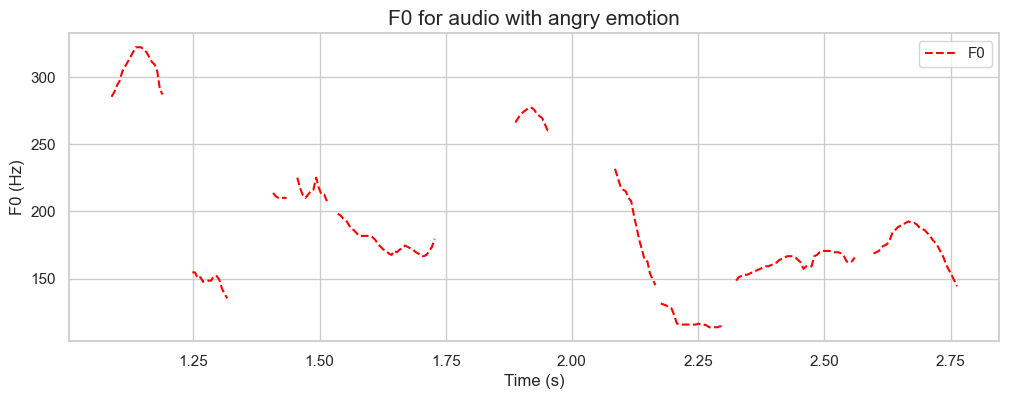

In [9]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
# Create time values for the x-axis
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


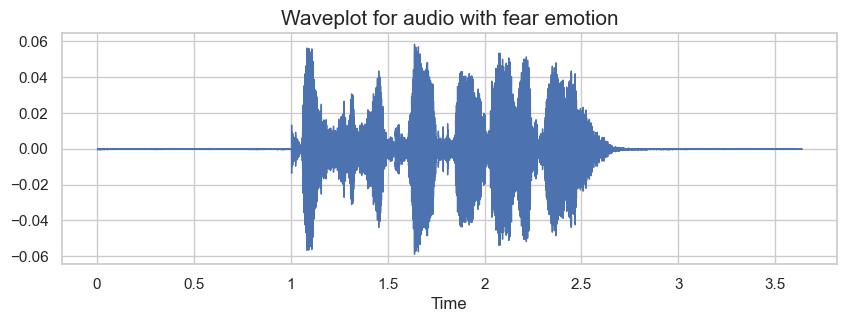

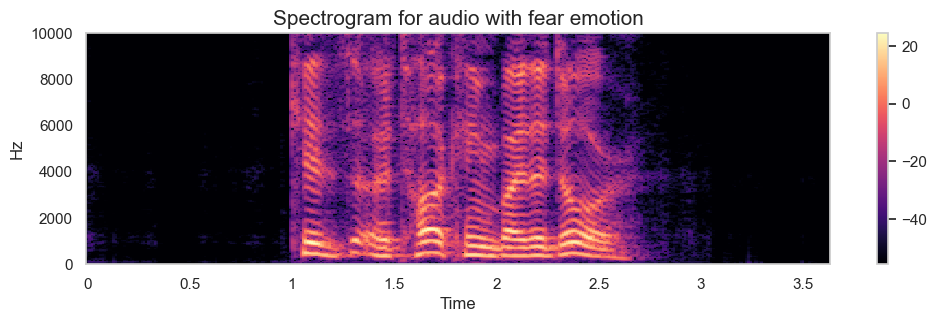

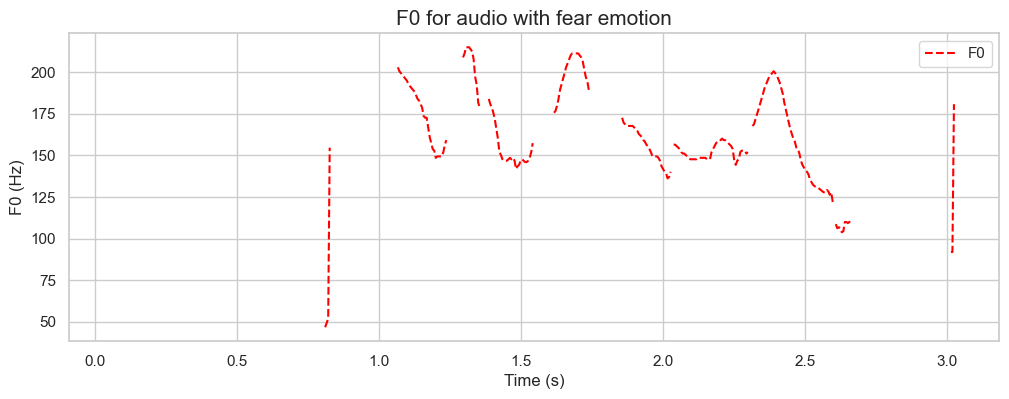

In [10]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
# Create time values for the x-axis
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


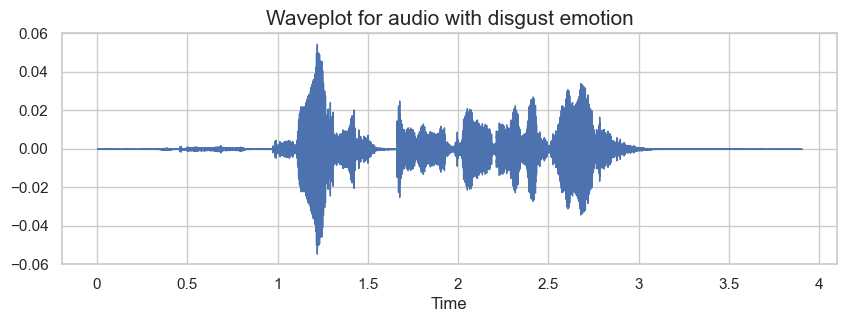

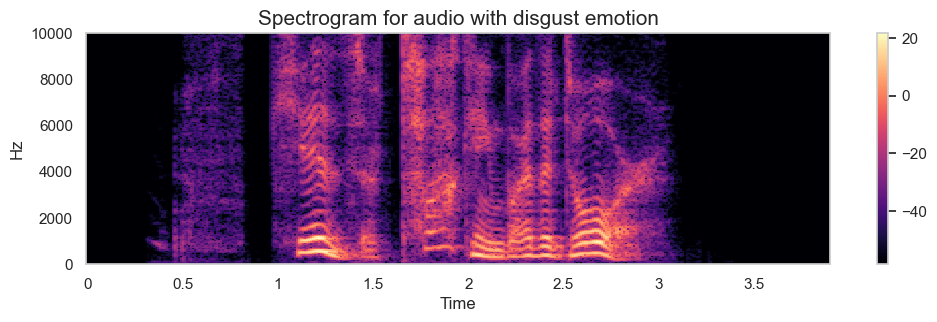

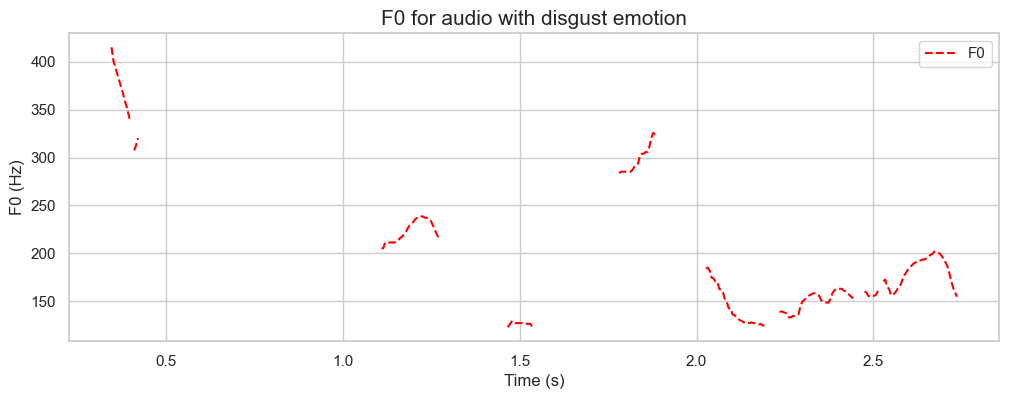

In [11]:
emotion='disgust'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
# Create time values for the x-axis
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


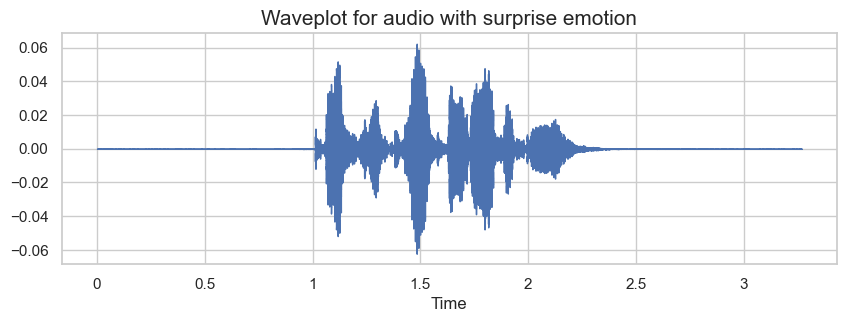

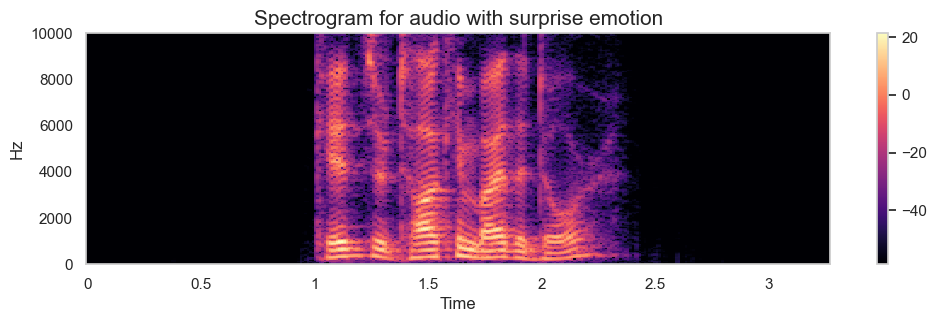

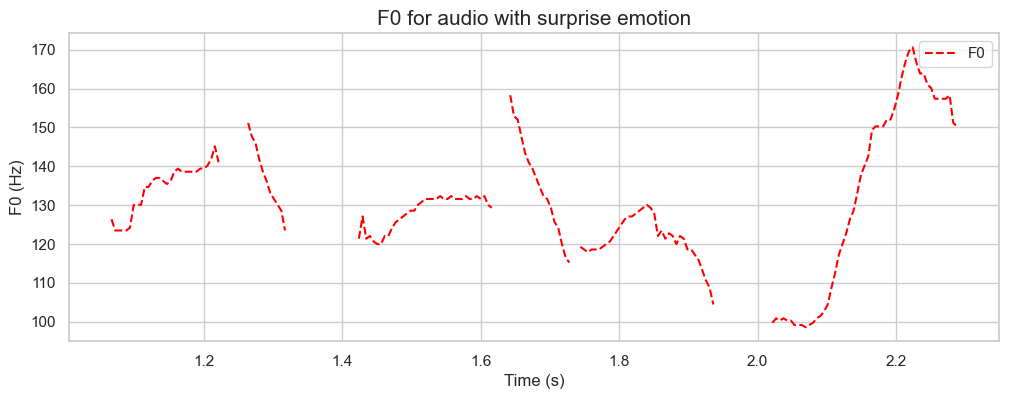

In [12]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
# Create time values for the x-axis
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Sample rate is 48000


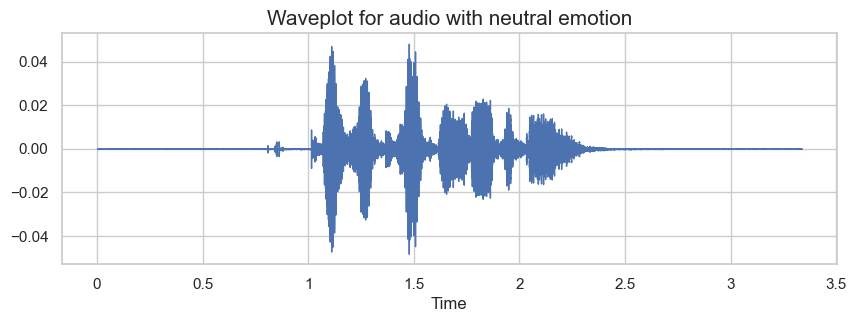

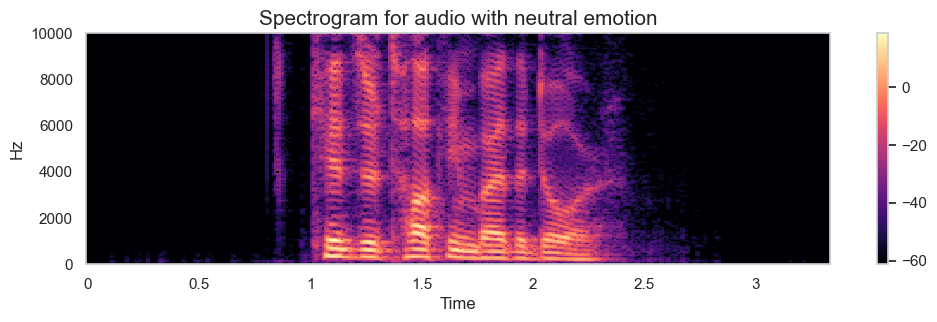

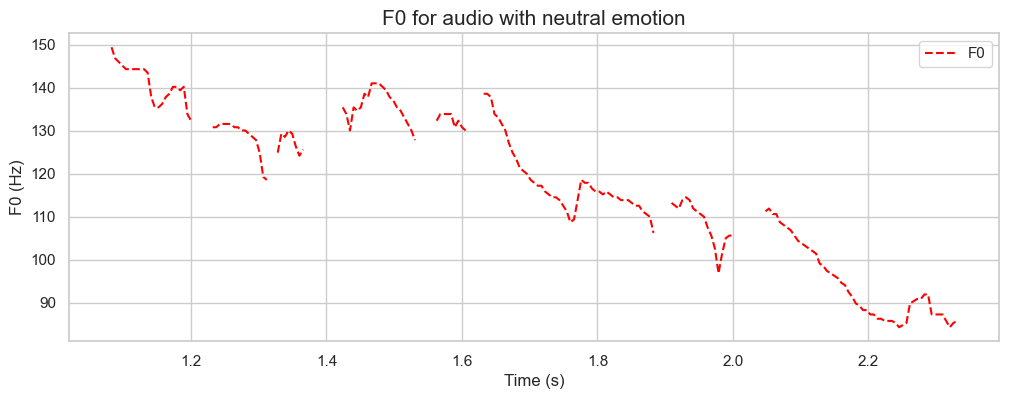

In [13]:
emotion='neutral'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
print(f"Sample rate is {sr}")
# Create time values for the x-axis
time = np.arange(0, len(signal)) / sr
plot_waveform(signal, sr, emotion)
plot_spectrogram(signal, sr, emotion)
plot_f0(signal,sr,emotion)
Audio(path)

Data Augmentation

In [3]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def time_scale(data, factor=1.6):
    return scipy.signal.resample(data, int(len(data) * factor))


def bandpass_filter(data, sampling_rate, lowcut=500, highcut=1500):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = scipy.signal.butter(4, [low, high], btype='band')
    return scipy.signal.filtfilt(b, a, data)



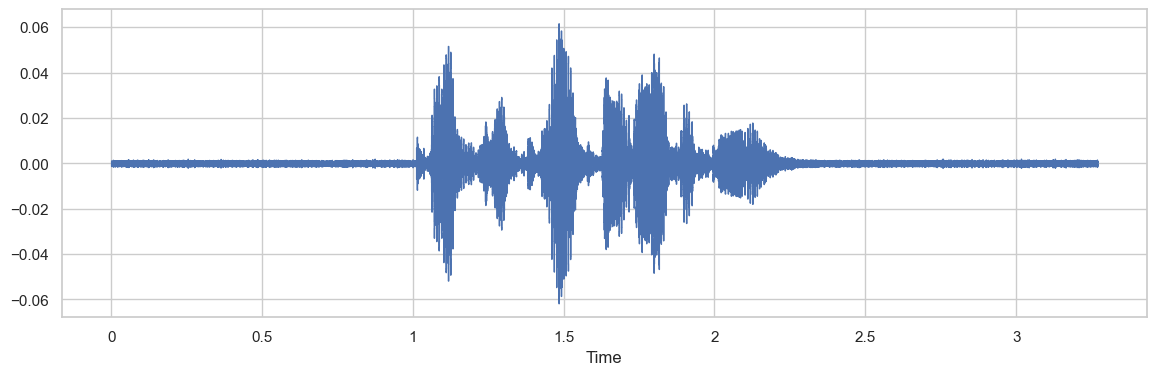

In [15]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
x = noise(signal)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

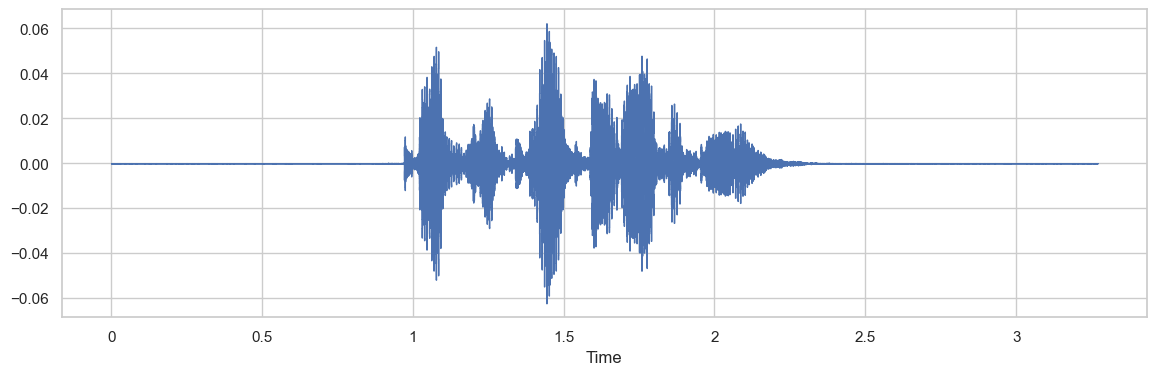

In [16]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
x = shift(signal)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

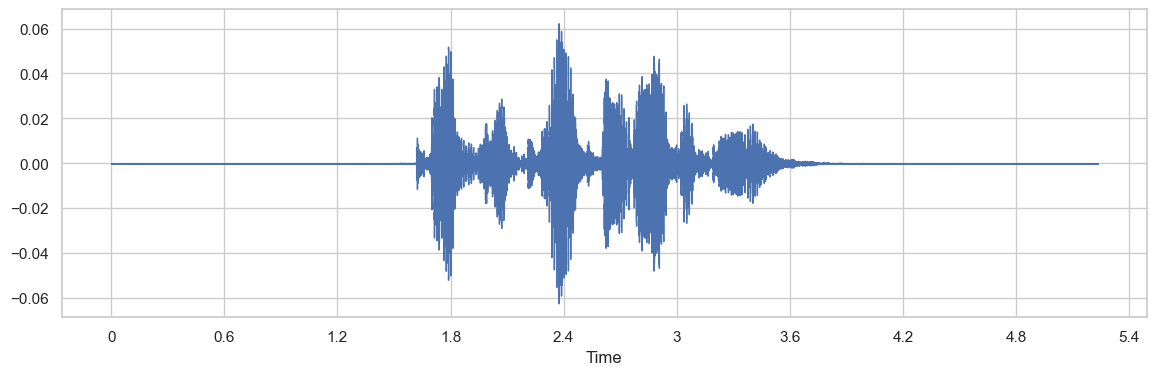

In [17]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
x = time_scale(signal)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

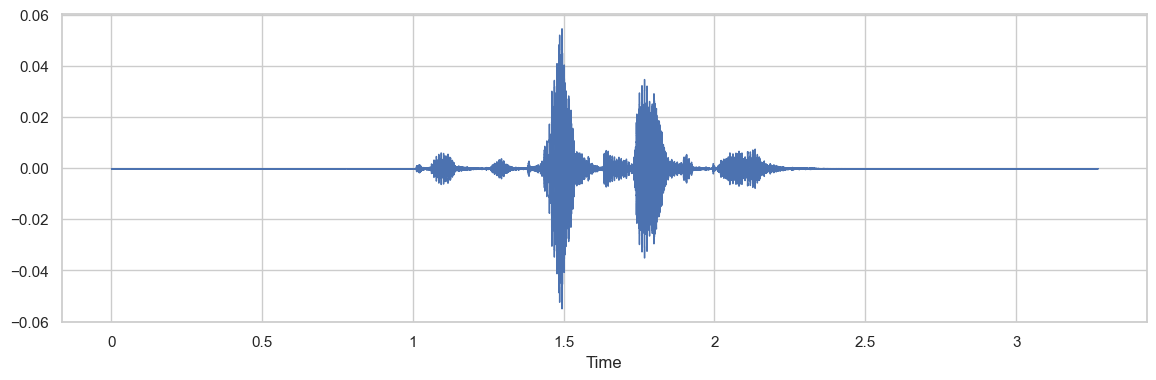

In [18]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
signal, sr = librosa.load(path, sr=None)
x = bandpass_filter(signal,sr)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

In [6]:


def feature_extraction(signal, sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=signal).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    #STFT
    stft = np.abs(librosa.stft(signal))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=signal).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally   
    
    # F0 (fundamental frequency)
    f0, voiced_flag, voiced_probs = librosa.pyin(signal, fmin=librosa.note_to_hz('C1'), fmax=librosa.note_to_hz('C8'))
    f0_mean = np.mean(f0[voiced_flag]) if np.sum(voiced_flag) > 0 else 0.0
    result = np.hstack((result, f0_mean))  # stacking horizontally

    return result

In [7]:
def read_files(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # 1 without augmentation
    res1 = feature_extraction(data, sample_rate)
    result = np.array(res1)
    # 2 Augmented Data
    noise_data = noise(data)
    res2 = feature_extraction(noise_data,sample_rate)
    result = np.vstack((result, res2)) 

    band_pass_data = bandpass_filter(data,sample_rate)
    res3 = feature_extraction(band_pass_data,sample_rate)
    result = np.vstack((result, res3))
    
    time_scale_data = time_scale(data)
    res4 = feature_extraction(time_scale_data,sample_rate)
    result = np.vstack((result, res4))
    
    shift_data = shift(data)
    res5 = feature_extraction(shift_data,sample_rate)
    result = np.vstack((result, res5))
    return result




In [8]:
data_features, data_labels = [], []

# Using tqdm to display a progress bar
for dir, label in tqdm(zip(Ravdess_df.Path, Ravdess_df.Emotions), total=len(Ravdess_df)):
    features = read_files(dir)
    for feature in features:
        data_features.append(feature)
        data_labels.append(label)




100%|██████████| 1440/1440 [3:15:33<00:00,  8.15s/it]  


In [ ]:
data_features

[array([ 3.21275499e-01, -6.45880737e+02,  7.26196365e+01,  8.41305315e-01,
         1.63994465e+01,  1.02415915e+01,  6.53900862e-01, -4.32800198e+00,
        -4.25893164e+00, -1.45758238e+01, -3.80628467e+00,  1.02242184e+00,
        -4.04266548e+00,  2.51960182e+00, -4.97224665e+00,  5.66447020e-01,
         1.03552699e+00, -5.41645145e+00, -2.44946885e+00, -1.78230596e+00,
        -1.21280587e+00,  7.29663849e-01,  7.50032425e-01,  7.30624318e-01,
         7.35274732e-01,  7.13528514e-01,  6.60530746e-01,  6.84966385e-01,
         7.33048975e-01,  7.53971457e-01,  7.36093044e-01,  7.17019498e-01,
         6.68644845e-01,  2.98800319e-03,  1.12702110e+02]),
 array([ 2.88854528e-01, -5.14527533e+02,  4.50585359e+01,  5.20609495e+00,
         1.14594735e+01,  7.18803753e+00, -4.36051083e-01, -4.79537881e+00,
        -7.62924417e+00, -1.17812063e+01, -6.30642960e+00, -5.48952150e-01,
        -3.17201505e+00, -1.61297082e+00, -2.86731401e+00, -8.05399740e-01,
        -1.59085108e-01, -4

In [9]:
len(data_features), len(data_labels), Ravdess_df.Path.shape

(7200, 7200, (1440,))

In [10]:
# Calculate the number of rows needed
num_rows = len(data_features)

# Create a list to store the rows
rows = []

# Create rows with 35 features each
for i in range(num_rows):
    row_data_dict = {f'feature{j+1}': data_features[i][j] for j in range(35)}
    row_data_dict['label'] = data_labels[i]
    rows.append(row_data_dict)

# Create the DataFrame
df = pd.DataFrame(rows)

# Displaying the DataFrame
df

feature1    feature2   feature3   feature4   feature5   feature6  \
0     0.321275 -645.880737  72.619637   0.841305  16.399446  10.241591   
1     0.327822 -427.216295  27.460060   9.006829   8.902693   5.480720   
2     0.073165 -798.191311  81.398763 -18.139052 -65.922642 -43.462605   
3     0.218790 -679.422119  97.246002  -5.239720  24.162828   3.046628   
4     0.319960 -646.223572  72.681160   0.895090  16.393309  10.257454   
...        ...         ...        ...        ...        ...        ...   
7195  0.219971 -448.716217  40.762936  -2.935251  -5.713507  -7.369172   
7196  0.318066 -279.304910  16.454455   2.726095  -7.273179  -6.794656   
7197  0.074228 -614.711352  89.342070 -21.793422 -77.147444 -53.260351   
7198  0.144895 -473.488342  76.422798 -23.373449  29.564104 -22.278933   
7199  0.218669 -447.555115  40.221626  -3.127824  -5.609446  -7.338534   

       feature7   feature8   feature9  feature10  ...  feature27  feature28  \
0      0.653901  -4.328002  -4.258932 -14.575824  ...   0.660531   0.684966   
1     -0.195925  -3.672437  -7.129746  -8.355064  ...   0.737077   0.668935   
2    -11.192910 -11.367317 -24.204680 -18.308786  ...   0.721514   0.638326   
3     19.962515   2.879078   2.504131  10.201258  ...   0.742239   0.750428   
4      0.651611  -4.367703  -4.198150 -14.577379  ...   0.655652   0.690300   
...         ...        ...        ...        ...  ...        ...        ...   
7195  -9.962165 -14.979671  -8.507465 -13.733122  ...   0.565728   0.585875   
7196  -4.154936  -7.550996  -4.562469  -7.966976  ...   0.696145   0.646670   
7197 -14.154507  -8.141814 -17.825708 -11.683085  ...   0.565204   0.519293   
7198  13.748715 -10.427844  -7.010154   0.719809  ...   0.623110   0.599437   
7199  -9.912105 -14.873247  -8.432185 -13.727840  ...   0.562746   0.577688   

      feature29  feature30  feature31  feature32  feature33  feature34  \
0      0.733049   0.753971   0.736093   0.717019   0.668645   0.002988   
1      0.729275   0.760236   0.778207   0.777732   0.754199   0.003554   
2      0.529008   0.445929   0.421734   0.466623   0.537130   0.001143   
3      0.756911   0.740354   0.648566   0.648486   0.703760   0.002841   
4      0.741327   0.758452   0.728422   0.712398   0.670309   0.002984   
...         ...        ...        ...        ...        ...        ...   
7195   0.636384   0.642514   0.665628   0.688886   0.692758   0.018255   
7196   0.679316   0.707320   0.708425   0.721394   0.734478   0.019930   
7197   0.500532   0.499902   0.483324   0.496791   0.557791   0.009619   
7198   0.575663   0.546409   0.549995   0.574809   0.623702   0.017672   
7199   0.623731   0.640854   0.648018   0.682412   0.704579   0.018249   

       feature35     label  
0     112.702110   neutral  
1     116.668604   neutral  
2     579.345640   neutral  
3      69.417282   neutral  
4     112.801373   neutral  
...          ...       ...  
7195  352.795960  surprise  
7196  353.215389  surprise  
7197  440.931330  surprise  
7198  219.884813  surprise  
7199  352.337811  surprise  

[7200 rows x 36 columns]

In [11]:
df.shape

(7200, 36)

In [12]:
df.to_csv('Features_after_augmentation.csv')

In [13]:
df['label'].value_counts()

calm        960
happy       960
sad         960
angry       960
fear        960
disgust     960
surprise    960
neutral     480
Name: label, dtype: int64